# Dynamic Programming Coding Tutorial

## Problem: Edit Distance
Given two strings `word1` and `word2`, return the minimum number of operations required to convert `word1` to `word2`.

You have the following three operations permitted on word
- Insert a character
- Delete a character
- Substitute a character

In [1]:
test1_word1 = 'snowy'
test1_word2 = 'sunny'
test1_dist = 3 # replace n with u, replace o with n, replace w with n

In [2]:
test2_word1 = 'intention'
test2_word2 = 'execution'
test2_dist = 5 # replace i n t e n with e x e c u respectively

In [3]:
test3_word1 = 'saturday'
test3_word2 = 'sunday'
test3_dist = 3 # remove a, remove t, replace u with n

In [4]:
testlarge_word1 = 'abaracadabra'
testlarge_word2 = 'babababababababababab'
testlarge_dist = 13 # figure it out

In [5]:
def runTests(f):
    test1_result = f(test1_word1, test1_word2, len(test1_word1), len(test1_word2))
    print('test1 distance: ', test1_result, 'correct: ', test1_result == test1_dist)
    test2_result = f(test2_word1, test2_word2, len(test2_word1), len(test2_word2))
    print('test2 distance: ', test2_result, 'correct: ', test2_result == test2_dist)
    test3_result = f(test3_word1, test3_word2, len(test3_word1), len(test3_word2))
    print('test3 distance: ', test3_result, 'correct: ', test3_result == test3_dist)

In [6]:
def editDistanceNaive(str1, str2, m, n):
    # m = len of str1
    # n = len of str2
    if m == 0:
        return n
    if n == 0:
        return m
    # snowy => snow
    # sunny => sunn
    if str1[m - 1] == str2[n - 1]:
        return editDistanceNaive(str1, str2, m - 1, n - 1)
    # snow => snown
    # sunn => sunn
    insert = editDistanceNaive(str1, str2, m, n - 1)
    
    # snow => sno
    # sunn => sunn
    delete = editDistanceNaive(str1, str2, m - 1, n)
    
    # snow => snon
    # sunn => sunn
    replace = editDistanceNaive(str1, str2, m - 1, n - 1)
    
    return min(insert, delete, replace) + 1

In [7]:
%%time
runTests(editDistanceNaive)

test1 distance:  3 correct:  True
test2 distance:  5 correct:  True
test3 distance:  3 correct:  True
Wall time: 3 ms


In [8]:
%%time
editDistanceNaive(testlarge_word1, testlarge_word2, len(testlarge_word1), len(testlarge_word2))

Wall time: 10.4 s


13

### Why is this inefficient?
- Multiple recursive calls with same arguments
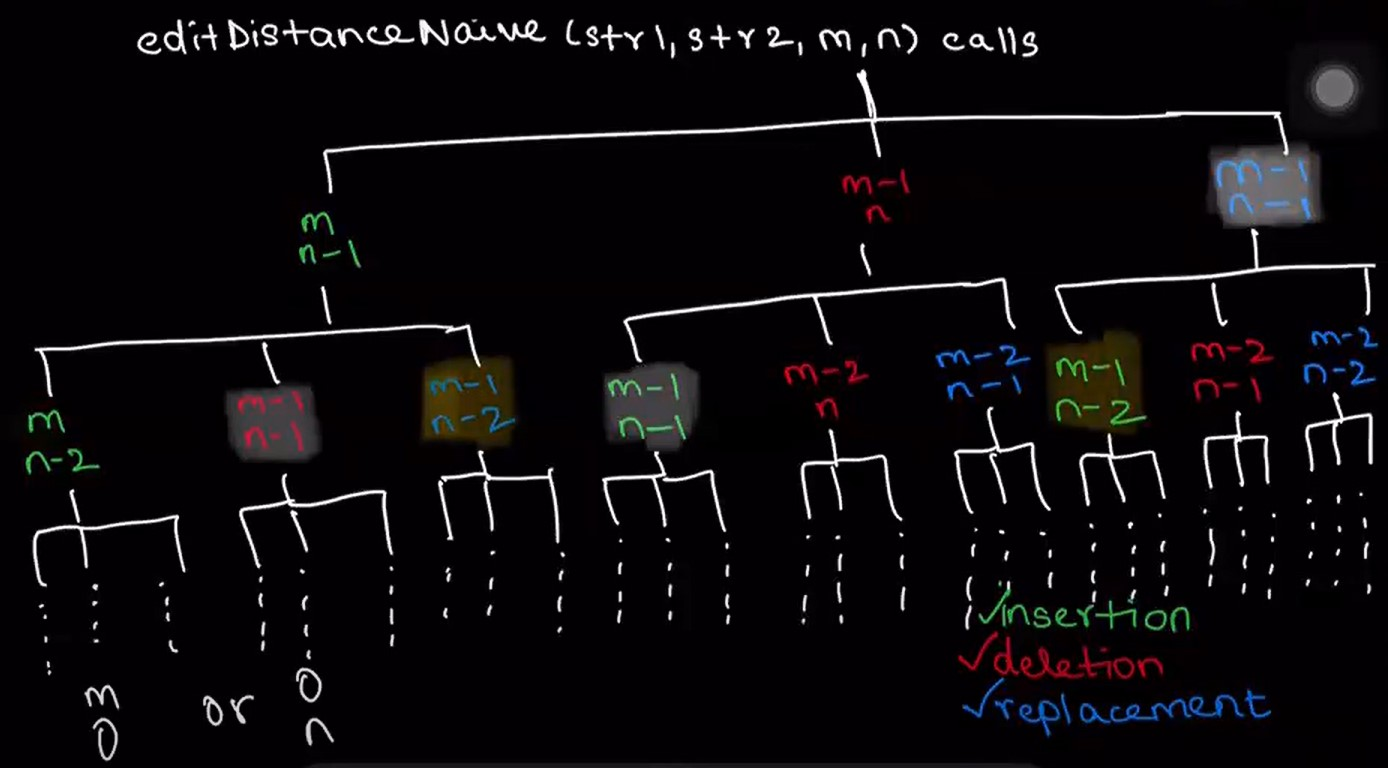

### DP Approach
- mth and nth entry relies on three entries as outlined below
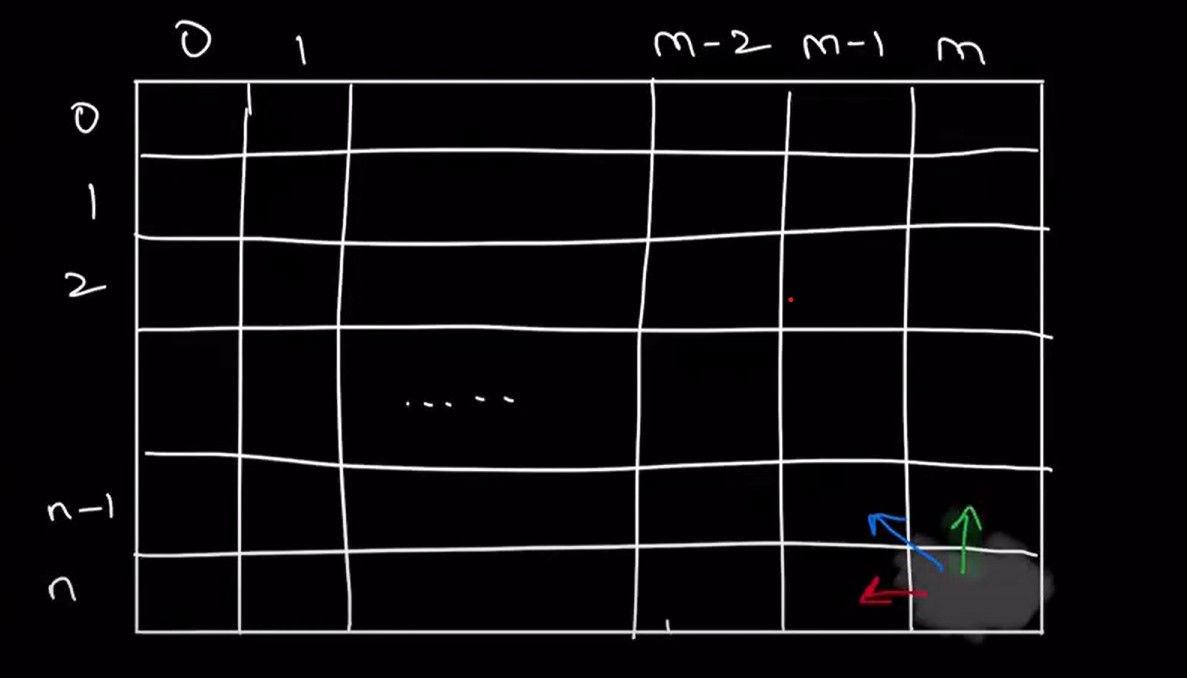

In [9]:
def editDistance(word1, word2, m, n):
    dp_mem = [[None for i in range(n + 1)] for j in range(m + 1)]
    
    def editDistanceHelper(str1, str2, m, n):
        if dp_mem[m][n] != None:
            return dp_mem[m][n]
        if m == 0:
            return n
        if n == 0:
            return m
        if str1[m - 1] == str2[n - 1]:
            
            return editDistanceHelper(str1, str2, m - 1, n - 1)
        
        insert = editDistanceHelper(str1, str2, m, n - 1)
        delete = editDistanceHelper(str1, str2, m - 1, n)
        replace = editDistanceHelper(str1, str2, m - 1, n - 1)
        
        dp_mem[m][n] = min(insert, delete, replace) + 1
        
        return dp_mem[m][n]
    
    return editDistanceHelper(word1, word2, m, n)

In [10]:
%%time
runTests(editDistance)

test1 distance:  3 correct:  True
test2 distance:  5 correct:  True
test3 distance:  3 correct:  True
Wall time: 2.01 ms


In [11]:
%%time
editDistance(testlarge_word1, testlarge_word2, len(testlarge_word1), len(testlarge_word2))

Wall time: 0 ns


13